# Build Your First Machine Learning Model!

Welome to the **Machine Learning** programming assignment of the **Artificial Intelligence** course.

In this assignment, a Jupyter Notebook is prepared for examining almost all critical factors in designing a Machine Leaning model for a supervised learning task.

You will complete this notebook to build a ML model, and apply it to a binary classification problem. Additionally you will get familiar with varoius factors which may enhance the performance of a ML model.

In this notebook, we will take advantage of four principal python libraries for data science and machine learning tasks.

 - [Numpy](https://numpy.org): The fundamental package for **scientific computing** with Python.
 - [Pandas](https://pandas.pydata.org): An open source **data analysis and manipulation tool**, built on top of the Python programming language.
 - [Matplotlib](https://matplotlib.org) : A comprehensive library for **creating static, animated, and interactive visualizations** in Python.
 - [Scikit-Learn](https://scikit-learn.org): Simple and efficient tools for predictive data analysis and building Machine Learning models.
 
**After this assignment you will be able to:**
1. Run Exploratory Data Analysis (EDA) and know how to prepare data for a predictive model.
2. Build and apply a Machine Learning model for a supervised learning problem using known frameworks.
 
 
 **Before you start:** Please read the ***Submission*** section at the bottom of the notebook carefully.
 
 Let's get started!



# 0. User UI Preference - Introduction

<p align="center">
  <img src="images/UI.png" width=1000>
</p>

The **User Interface (UI)** is the graphical layout of an application. It consists of the buttons users click on, the text they read, the images, sliders, text entry fields, and all the rest of the items the user interacts with. This includes screen layout, transitions, interface animations and every single micro-interaction. Any sort of visual element, interaction, or animation must all be designed.

An ecommerce company has changed the UI of it's website recently but they do not know how it is possible to evaluate their new UI. Do customers like it? Do they prefer the new UI or the old one?

They have also collected feedbacks from their customers based on some pre-organized surveys. You as Machine Learning engineers are aksed to **build a Machine Learning Model so to identify the User UI preference on the basis of their UI engagement information.**

## Data

There are two files that you need to consider. *(i)* `train.csv` for training, and *(ii)* `test.csv` for testing purposes. They consist 14 columns with the following description:


| Column name | Description |
| ------------- | ------------- |
| **CustomerID** | Represents a unique identification of a user |
| **Age** | Represents the age of the user |
| **City** | Represents the city in which the user lives |
| **State** | Represents the state in which the user lives |
| **No_of_orders_placed** | Represents the total number of orders placed by a customer |
| **Last order placed_date** | Represents the last date when the customer placed the order |
| **is premium_member** | Represents whether a customer is a premium member or not. ( 0 or 1) |
| **Women's Clothing** | Represents user's engagement score in Women's_Clothing section ( 0 to 10 ) |
| **Men's Clothing** | Represents user's engagement score in Men's Clothing section( 0 to 10 ) |
| **Kid's Clothing** | Represents user's engagement score in Kid's Clothing section ( 0 to 10 ) |
| **Home &_Living** | Represents user's engagement score in Home_&_Living section ( 0 to 10 ) |
| **Beauty** | Represents user's engagement score in Beauty products section ( 0 to 10 ) |
| **Electronics** | Represents user's engagement score in Electronics products section( 0 to 10 ) |
| **Preferred_Theme** | Represents the preferred theme ( Old_UI or New_UI) |


## Packages
Let's first import all the packages that you will need during this assignment.

In [387]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Data preprocessing


What's Data preprocessing? **Data preprocessing** is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

Some of the main preprocessing steps are:

  - **Handling missing values**: impute missing (NaN) values
  - **Standardization**: normalize our data for a more quick convergence of the model
  - **Handling Categorical Variables**: one-hot encoding is an appropirate solution
  - ...
  
In this assignment, you will apply some of these methods step by step.

In [388]:
# load the dataset into a dataframe
train_df = pd.read_csv('data/train.csv', index_col=0)
test_df = pd.read_csv('data/test.csv', index_col=0)

print(f'Number of training samples: {len(train_df)}')
print(f'Number of test samples: {len(test_df)}')
train_df.head(10)

Number of training samples: 10605
Number of test samples: 4545


,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
0,CusID_00685,19.0,Not_Specified,Bercelona,Singapore,14.0,1/17/2017,9/19/2020,1,3.445937,2.620136,5.457500,6.141905,8.106490,4.389933,Old_UI
1,CusID_06121,31.0,Male,Sydney,New South Wales,10.0,1/22/2016,12/9/2021,0,1.320304,9.025863,6.378695,2.825636,0.977430,7.789076,New_UI
2,CusID_09847,NaN,Not_Specified,Toronto,Ontario,12.0,8/7/2019,10/13/2021,1,3.793410,0.726490,3.957772,3.000000,2.589856,7.426173,Old_UI
3,CusID_01433,29.0,Not_Specified,Toronto,Ontario,15.0,2/27/2016,10/22/2020,1,2.362948,2.701855,3.522246,3.121818,2.259882,5.970419,Old_UI
4,CusID_02167,38.0,Female,?,British Columbia,3.0,7/4/2019,3/17/2020,0,7.568971,2.161103,7.535511,0.865851,4.638520,9.061972,Old_UI
5,CusID_02674,30.0,Female,Kolkata,West Bengal,10.0,7/29/2017,2/21/2021,0,8.790859,4.219936,3.000000,6.395232,9.539830,1.066810,Old_UI
6,CusID_05594,27.0,Female,Kuala Lampur,Singapore,7.0,9/29/2017,7/24/2020,0,7.496507,6.065087,6.757594,8.390672,2.000000,3.440012,New_UI
7,CusID_09297,27.0,Female,Munich,Catalonia,7.0,4/18/2018,3/15/2020,0,7.447626,0.724823,8.645873,7.822508,7.069303,2.882355,New_UI
8,CusID_03771,18.0,Female,Vienna,Vienna,4.0,4/2/2018,2/15/2021,0,7.573536,4.267514,4.359906,NaN,6.521518,0.482545,New_UI
9,CusID_00667,19.0,Female,London,England,13.0,8/11/2017,1/9/2020,1,5.061261,3.822283,NaN,7.377240,9.669255,2.410884,Old_UI



### preprocessing 

before that start to handle missing value we do something 

first remove useless parameters 


In [389]:

train_df.drop('City', axis=1, inplace=True)
train_df.drop('CustomerID', axis=1, inplace=True)
train_df.drop('Sign_up_date', axis=1, inplace=True)
train_df.drop('Last_order_placed_date', axis=1, inplace=True)
train_df.drop('No_of_orders_placed', axis=1, inplace=True)
train_df.drop('State', axis=1, inplace=True)




test_df.drop('City', axis=1, inplace=True)
test_df.drop('CustomerID', axis=1, inplace=True)
test_df.drop('Sign_up_date', axis=1, inplace=True)
test_df.drop('Last_order_placed_date', axis=1, inplace=True)
test_df.drop('No_of_orders_placed', axis=1, inplace=True)
test_df.drop('State', axis=1, inplace=True)


train_df.head(10)

,Age,Gender,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
0,19.0,Not_Specified,1,3.445937,2.620136,5.457500,6.141905,8.106490,4.389933,Old_UI
1,31.0,Male,0,1.320304,9.025863,6.378695,2.825636,0.977430,7.789076,New_UI
2,NaN,Not_Specified,1,3.793410,0.726490,3.957772,3.000000,2.589856,7.426173,Old_UI
3,29.0,Not_Specified,1,2.362948,2.701855,3.522246,3.121818,2.259882,5.970419,Old_UI
4,38.0,Female,0,7.568971,2.161103,7.535511,0.865851,4.638520,9.061972,Old_UI
5,30.0,Female,0,8.790859,4.219936,3.000000,6.395232,9.539830,1.066810,Old_UI
6,27.0,Female,0,7.496507,6.065087,6.757594,8.390672,2.000000,3.440012,New_UI
7,27.0,Female,0,7.447626,0.724823,8.645873,7.822508,7.069303,2.882355,New_UI
8,18.0,Female,0,7.573536,4.267514,4.359906,NaN,6.521518,0.482545,New_UI
9,19.0,Female,1,5.061261,3.822283,NaN,7.377240,9.669255,2.410884,Old_UI




now convert Preferred_Theme to 0,1



In [390]:
train_df.rename(columns={'Preferred_Theme': 'Old_UI'}, inplace=True)

mask = train_df["Old_UI"] == "Old_UI"

train_df["Old_UI"] = mask
train_df["Old_UI"] = train_df["Old_UI"].astype(int)


test_df.rename(columns={'Preferred_Theme': 'Old_UI'}, inplace=True)

mask = test_df["Old_UI"] == "Old_UI"

test_df["Old_UI"] = mask
test_df["Old_UI"] = test_df["Old_UI"].astype(int)


train_df.head(10)

,Age,Gender,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Old_UI
0,19.0,Not_Specified,1,3.445937,2.620136,5.457500,6.141905,8.106490,4.389933,1
1,31.0,Male,0,1.320304,9.025863,6.378695,2.825636,0.977430,7.789076,0
2,NaN,Not_Specified,1,3.793410,0.726490,3.957772,3.000000,2.589856,7.426173,1
3,29.0,Not_Specified,1,2.362948,2.701855,3.522246,3.121818,2.259882,5.970419,1
4,38.0,Female,0,7.568971,2.161103,7.535511,0.865851,4.638520,9.061972,1
5,30.0,Female,0,8.790859,4.219936,3.000000,6.395232,9.539830,1.066810,1
6,27.0,Female,0,7.496507,6.065087,6.757594,8.390672,2.000000,3.440012,0
7,27.0,Female,0,7.447626,0.724823,8.645873,7.822508,7.069303,2.882355,0
8,18.0,Female,0,7.573536,4.267514,4.359906,NaN,6.521518,0.482545,0
9,19.0,Female,1,5.061261,3.822283,NaN,7.377240,9.669255,2.410884,1


## 1.1 Missing values (10 points):

In any real-world dataset, there are always few null values. It doesn’t really matter whether it is a regression, classification or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.

```
- In python NULL is reprsented with NaN. So don’t get confused between these two,they can be used interchangably.
```

First of all, we need to check whether we have null values in our dataset or not:

### first of all we see more information about the dataset

In [391]:
profile = ProfileReport(train_df)
profile.to_file('UI.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [392]:
print("Training set:")
print(train_df.isna().sum())
print("============================")
print("Test set:")
print(test_df.isna().sum())

Training set:
Age                  729
Gender                 0
is_premium_member      0
Women’s_Clothing       0
Men’s_Clothing         0
Kid’s_Clothing       648
Home_&_Living        595
Beauty                 0
Electronics            0
Old_UI                 0
dtype: int64
Test set:
Age                  274
Gender                 0
is_premium_member      0
Women’s_Clothing       0
Men’s_Clothing         0
Kid’s_Clothing       287
Home_&_Living        253
Beauty                 0
Electronics            0
Old_UI                 0
dtype: int64


There are various ways for us to handle this problem. The easiest way to solve this problem is by dropping the rows or columns that contain null values.

Here is a link for you too choose your method and then apply it on both train and test set:
https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

#### according to "UI.html" we can predict the Gender with value Not_Specified

In [393]:
print(train_df["Gender"].value_counts(),end="\n\n")

mask1 = train_df["Home_&_Living"] < 5
mask2 = train_df["Gender"] == "Male"
mask3 = train_df["Gender"] == "Not_Specified"


print(mask1.value_counts(),end="\n\n")
print(mask2.value_counts(),end="\n\n")
print(mask3.value_counts(),end="\n")

print("\nand of Home_&_Living ,Male :")
print((mask2 * mask1).value_counts())
print("\nand of Home_&_Living ,Not_Specified :")
print( (mask3 * mask1).value_counts())


Male             4638
Female           4421
Not_Specified    1546
Name: Gender, dtype: int64

True     5838
False    4767
Name: Home_&_Living, dtype: int64

False    5967
True     4638
Name: Gender, dtype: int64

False    9059
True     1546
Name: Gender, dtype: int64

and of Home_&_Living ,Male :
False    6616
True     3989
dtype: int64

and of Home_&_Living ,Not_Specified :
False    9438
True     1167
dtype: int64


### according to output of above we recognize that most of people with Not_Specified Gender and Home_&_Living's point is less than 5, are Male

In [394]:
mask1 = train_df["Beauty"] < 5
mask2 = train_df["Gender"] == "Male"
mask3 = train_df["Gender"] == "Not_Specified"


print(mask1.value_counts(),end="\n\n")
print(mask2.value_counts(),end="\n\n")
print(mask3.value_counts())

print("\nand of Beauty ,Male :")
print((mask2 * mask1).value_counts())
print("\nand of Beauty ,Not_Specified :")
print( (mask3 * mask1).value_counts())

True     6632
False    3973
Name: Beauty, dtype: int64

False    5967
True     4638
Name: Gender, dtype: int64

False    9059
True     1546
Name: Gender, dtype: int64

and of Beauty ,Male :
False    6162
True     4443
dtype: int64

and of Beauty ,Not_Specified :
False    9432
True     1173
dtype: int64


### according to output of above we recognize that most of people with Not_Specified Gender and Beauty's point is less than 5, are Male
### according to two Conclusion of above we handle the Not_Specified category in Gender column 

In [395]:


##   train_df
mask = train_df[train_df['Gender'] == "Not_Specified"]

male_mask = mask[mask["Beauty"] < 5]

male_mask = male_mask[male_mask["Home_&_Living"] < 5]

male_mask["Gender"].replace({"Not_Specified": "Male"}, inplace=True)

train_df.update(male_mask)

train_df["Gender"].replace({"Not_Specified": "Female"}, inplace=True)


##   test_df

mask = test_df[test_df['Gender'] == "Not_Specified"]

male_mask = mask[mask["Beauty"] < 5]

male_mask = male_mask[male_mask["Home_&_Living"] < 5]

male_mask["Gender"].replace({"Not_Specified": "Male"}, inplace=True)

test_df.update(male_mask)

test_df["Gender"].replace({"Not_Specified": "Female"}, inplace=True)



print(train_df["Gender"].value_counts())


train_df.head(5)



Male      5559
Female    5046
Name: Gender, dtype: int64


,Age,Gender,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Old_UI
0,19.0,Female,1.0,3.445937,2.620136,5.457500,6.141905,8.106490,4.389933,1.0
1,31.0,Male,0.0,1.320304,9.025863,6.378695,2.825636,0.977430,7.789076,0.0
2,NaN,Male,1.0,3.793410,0.726490,3.957772,3.000000,2.589856,7.426173,1.0
3,29.0,Male,1.0,2.362948,2.701855,3.522246,3.121818,2.259882,5.970419,1.0
4,38.0,Female,0.0,7.568971,2.161103,7.535511,0.865851,4.638520,9.061972,1.0


### for last step in handle missing values we use Nearest Neighbors Imputations.
### but for using Nearest Neighbors Imputations al of data must be numerical 
### so we should be Handle categorical Variables first.

## 1.2 Handling categorical Variables (10 points):

Handling categorical variables is another integral aspect of Machine Learning. Categorical variables are basically the variables that are discrete and not continuous. One of the methods to do this is **One-hot encoding**:

**-One-hot encoding:**

For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In the “color” variable example, there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.

```
red,	green,	blue
1,		0,		0
0,		1,		0
0,		0,		1
```

In [396]:
# Now you have to convert the categorical features in the 
# dataset to one-hot encoded representation.

## train_df
train_df = pd.get_dummies(train_df)

## test_df
test_df = pd.get_dummies(test_df)

train_df.head(10)




,Age,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Old_UI,Gender_Female,Gender_Male
0,19.0,1.0,3.445937,2.620136,5.457500,6.141905,8.106490,4.389933,1.0,1,0
1,31.0,0.0,1.320304,9.025863,6.378695,2.825636,0.977430,7.789076,0.0,0,1
2,NaN,1.0,3.793410,0.726490,3.957772,3.000000,2.589856,7.426173,1.0,0,1
3,29.0,1.0,2.362948,2.701855,3.522246,3.121818,2.259882,5.970419,1.0,0,1
4,38.0,0.0,7.568971,2.161103,7.535511,0.865851,4.638520,9.061972,1.0,1,0
5,30.0,0.0,8.790859,4.219936,3.000000,6.395232,9.539830,1.066810,1.0,1,0
6,27.0,0.0,7.496507,6.065087,6.757594,8.390672,2.000000,3.440012,0.0,1,0
7,27.0,0.0,7.447626,0.724823,8.645873,7.822508,7.069303,2.882355,0.0,1,0
8,18.0,0.0,7.573536,4.267514,4.359906,NaN,6.521518,0.482545,0.0,1,0
9,19.0,1.0,5.061261,3.822283,NaN,7.377240,9.669255,2.410884,1.0,1,0


### now we can use Nearest Neighbors Imputations

In [397]:
## train_df
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(train_df)
train_df = pd.DataFrame(imputed, columns=train_df.columns)

## test_df
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(test_df)
test_df = pd.DataFrame(imputed, columns=test_df.columns)


train_df.head(10)

,Age,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Old_UI,Gender_Female,Gender_Male
0,19.0,1.0,3.445937,2.620136,5.457500,6.141905,8.106490,4.389933,1.0,1.0,0.0
1,31.0,0.0,1.320304,9.025863,6.378695,2.825636,0.977430,7.789076,0.0,0.0,1.0
2,36.0,1.0,3.793410,0.726490,3.957772,3.000000,2.589856,7.426173,1.0,0.0,1.0
3,29.0,1.0,2.362948,2.701855,3.522246,3.121818,2.259882,5.970419,1.0,0.0,1.0
4,38.0,0.0,7.568971,2.161103,7.535511,0.865851,4.638520,9.061972,1.0,1.0,0.0
5,30.0,0.0,8.790859,4.219936,3.000000,6.395232,9.539830,1.066810,1.0,1.0,0.0
6,27.0,0.0,7.496507,6.065087,6.757594,8.390672,2.000000,3.440012,0.0,1.0,0.0
7,27.0,0.0,7.447626,0.724823,8.645873,7.822508,7.069303,2.882355,0.0,1.0,0.0
8,18.0,0.0,7.573536,4.267514,4.359906,5.601517,6.521518,0.482545,0.0,1.0,0.0
9,19.0,1.0,5.061261,3.822283,7.015989,7.377240,9.669255,2.410884,1.0,1.0,0.0


In [398]:
print("Training set:")
print(train_df.isna().sum())
print("============================")
print("Test set:")
print(test_df.isna().sum())

Training set:
Age                  0
is_premium_member    0
Women’s_Clothing     0
Men’s_Clothing       0
Kid’s_Clothing       0
Home_&_Living        0
Beauty               0
Electronics          0
Old_UI               0
Gender_Female        0
Gender_Male          0
dtype: int64
Test set:
Age                  0
is_premium_member    0
Women’s_Clothing     0
Men’s_Clothing       0
Kid’s_Clothing       0
Home_&_Living        0
Beauty               0
Electronics          0
Old_UI               0
Gender_Female        0
Gender_Male          0
dtype: int64


## 1.3 Standardization (10 points):

It is another integral preprocessing step. In Standardization, we transform our values such that the mean of the values is 0 and the standard deviation is 1.

**Hint:** Use `sklearn.preprocessing.StandardScaler` to do it.

In [399]:
# Standardize your train/test data.
# Important note: You must use the mean and standard deviation of train data for test set! You know why :)

# ["is_premium_member", "Old_UI", "Gender_Female", "Gender_Male"] this data not need to standardization 

# so we save them in train_df_2 and after standardization, update the train_df

train_df_2 = train_df[["is_premium_member", "Old_UI", "Gender_Female", "Gender_Male"]]
scaler = StandardScaler().fit(train_df)
standardized_train_df = scaler.transform(train_df)
train_df = pd.DataFrame(standardized_train_df,
                        columns=["Age", "is_premium_member", "Women’s_Clothing", "Men’s_Clothing", "Kid’s_Clothing",
                                 "Home_&_Living", "Beauty", "Electronics", "Old_UI", "Gender_Female", "Gender_Male"])
train_df.update(train_df_2)



# test_df
test_df_2 = test_df[["is_premium_member", "Old_UI", "Gender_Female", "Gender_Male"]]
standardized_test_df = scaler.transform(test_df)
test_df = pd.DataFrame(standardized_test_df,
                       columns=["Age", "is_premium_member", "Women’s_Clothing", "Men’s_Clothing", "Kid’s_Clothing",
                                "Home_&_Living", "Beauty", "Electronics", "Old_UI", "Gender_Female", "Gender_Male"])
test_df.update(test_df_2)



The preprocess steps you have done till now,were the most essential methods to preprocess a raw data. Otherwise, you are free to do more on this phase.

For instance, **Feature Engineering** is a great example of preprocessing steps. It includes creating new features by mixing existing variables in order to help the ML model classify the sampels more accuratly.

# 2. Designing ML models

In this section, we are going to build, compile and train our ML models. There are a huge number of various models which you can use and fortunatly, almost all of them has been implemented in [Scikit-Learn](https://scikit-learn.org).

However in this assignment, **you have to choose one of the following ML algorithms**, and implement it from scratch **without using existing frameworks**.

   - **KNN**
   - **Naive Bayes**
   
There are a plenty of resourcse and tutorials for these two algorithm on the internet. Just search them and read about them.

## 2.1 KNN or Naive Bayes from scratch (25 points):

In [400]:
# KNN from scratch 


def knn(data_x,data_y, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []

    # 3. For each example in the data
    for index, example in enumerate(data_x):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)

        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))

    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)

    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]

    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data_y[i] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices, choice_fn(k_nearest_labels)


def mean(labels):
    return sum(labels) / len(labels)


def mode(labels):
    return Counter(labels).most_common(1)[0][0]


def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

In [403]:


X_train = train_df.drop("Old_UI", axis=1)
y_train = train_df["Old_UI"]
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()


# run model on test data

X_test = test_df.drop("Old_UI", axis=1)
y_test = test_df["Old_UI"]
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

predicts_test = []
for k in range(1,40):
    predict = []
    for i in range(len(y_test)):
        clf_k_nearest_neighbors, clf_prediction = knn(X_train, y_train, X_test[i], k=k, distance_fn=euclidean_distance,
                                                      choice_fn=mode)
        predict.append(clf_prediction == y_test[i])
    predicts_test.append(predict)


temp = []
for predict in predicts_test:
    true = predict.count(True)
    false = predict.count(False)
    temp.append(true/(true+false))

predicts_test = temp

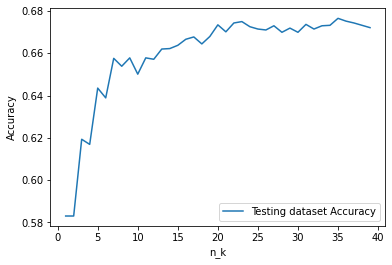

In [413]:
k = [i for i in range(1,40)]

plt.plot(k, predicts_test, label='Testing dataset Accuracy')


plt.legend()
plt.xlabel('n_k')
plt.ylabel('Accuracy')
plt.show()

## 2.2 Other common ML models (25 points):

In this part you have to use predefined ML algorithms in [Scikit-Learn](https://scikit-learn.org) to implement other known models. **You must at least try 2 differnt models** to get the full score of this part.

**Note 1:** But you are free to try other model as much as you can to get higher performances.

**Note 2:** Writing about how those algorithms work has bonus!


You can see a complete list of exisiting models in Scikit-learn documentation: https://scikit-learn.org/stable/supervised_learning.html

In [346]:
################ Logistic Regression algorithm ################

lr = LogisticRegression()
lr.fit(X_train,y_train)

# Predicting the Test set results
y_pred_lr = lr.predict(X_test)


################ Naive Bayes algorithm ##################

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_nb = classifier.predict(X_test)



## 2.3 Evaluation (20 points):

Great! You are now able to evaluate your model and see how nice your algorithm is able to classify positive and negative samples both on train and validation data.

For this, we are going to use 4 metrics. It is highly recommnded to read about them and know how benficial they are for different purposes:

- Accuracy
- Precision
- Recall
- F1-score

Use `sklearn.metrics` to implement them and report the results on both train and validation data.

In [347]:
print("Logistic Regression evaluation :")

print("\tF1 score is " + "{:.2f}".format(f1_score(y_test, y_pred_lr)*100) + " %")
print("\tRecall score is " + "{:.2f}".format(recall_score(y_test, y_pred_lr)*100) + " %")
print("\tAccuracy score is " + "{:.2f}".format(accuracy_score(y_test, y_pred_lr)*100) + " %")
print("\tPrecision score is " + "{:.2f}".format(precision_score(y_test, y_pred_lr)*100) + " %")



print("\nNaive Bayes evaluation :")

print("\tF1 score is " + "{:.2f}".format(f1_score(y_test, y_pred_nb)*100) + " %")
print("\tRecall score is " + "{:.2f}".format(recall_score(y_test, y_pred_nb)*100) + " %")
print("\tAccuracy score is " + "{:.2f}".format(accuracy_score(y_test, y_pred_nb)*100) + " %")
print("\tPrecision score is " + "{:.2f}".format(precision_score(y_test, y_pred_nb)*100) + " %")






Logistic Regression evaluation :
	F1 score is 68.47 %
	Recall score is 71.68 %
	Accuracy score is 67.17 %
	Precision score is 65.53 %

Naive Bayes evaluation :
	F1 score is 66.27 %
	Recall score is 66.77 %
	Accuracy score is 66.20 %
	Precision score is 65.78 %


# 3. Submission

Please read the notes here carefully:

1. In addition to completing the code files, please send a report including your answer to these questions as well. Do not forget to put the diagrams and visualizations needed in each part.

2. The file you upload must be named as `[Student ID]-[Your name].zip.`
3. Your notebook must be executed without any problem. If not, you will lose points for each part consequently.
4. **Important Note:** The outputs of the code blocks must be remained in your notebook, otherwise, you definitly lose all the points of that part.



In case you have any questions, contact **mohammad99hashemi@gmail.com**.


Good luck :)